<a href="https://colab.research.google.com/github/dori1888/4GeeksAcademy/blob/master/Tutorial_de_proyecto_de_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Cargar los datos


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import numpy as np

In [99]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Paso 2: Comprender los datos

In [100]:
# informacion general de dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Esto me dice:

cuántas columnas

tipos de datos

si hay nulos

In [101]:


# Cargar tus datos
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

# Nos quedamos con las variables que queremos estudiar
# Por ejemplo: bmi (índice masa corporal) y charges (coste del seguro)
df = df[['bmi', 'charges']]

# Mostrar primeras filas
df.head()




,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


Felix en la classe quería hacer una regresión simple con dos variables.

Con mi datos las mejores columnas equivalentes son:

bmi → algo numérico, útil para predecir

charges → es el precio que queremos predecir

In [102]:
df.shape


(1338, 2)

In [103]:
X = df['bmi']
y = df['charges']

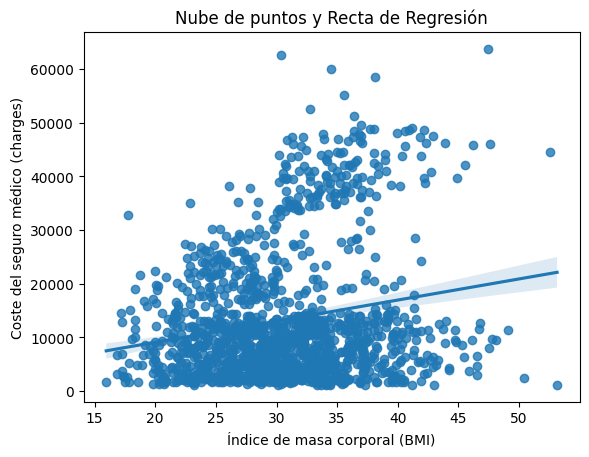

In [104]:
sns.regplot(x="bmi", y="charges", data=df)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Coste del seguro médico (charges)")
plt.show()


In [105]:
# 1. Definimos X e y
X = df['bmi']        # variable explicativa
y = df['charges']    # variable objetivo

# 2. Añadimos la constante (intercepto)
X = sm.add_constant(X)

# 3. Creamos y ajustamos el modelo OLS
model = sm.OLS(y, X)
results = model.fit()

# 4. Mostramos el resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           2.46e-13
Time:                        22:08:45   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

En la tabla :

Dep. Variable: charges

Coeficientes: const e bmi

Luego puedo interpretar:

el signo del coeficiente de bmi

el R-squared

el p-value, etc.

In [106]:
residuos = results.resid

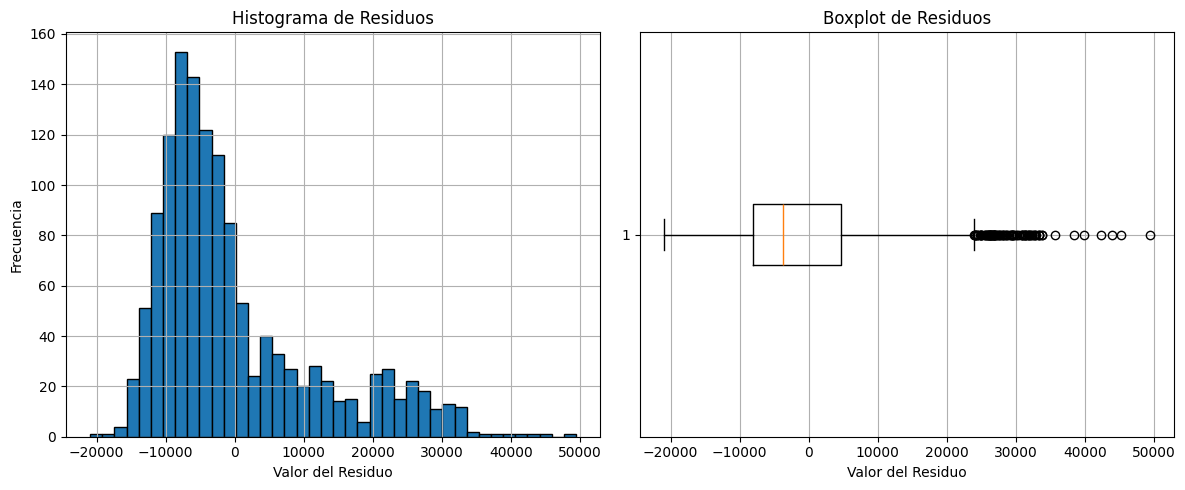

In [107]:


# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()


In [108]:


df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
df.shape

(1338, 7)

¿Por qué necesitas convertir las variables categóricas?

Mi dataset de seguro médico tiene columnas como:

sex → male / female

smoker → yes / no

region → southeast / southwest / northeast / northwest

Estas variables son texto.
### Los modelos de Machine Learning no pueden trabajar con texto.

¿Qué hace exactamente pd.get_dummies()?
| sex    | smoker |
| ------ | ------ |
| male   | yes    |
| female | no     |
| male   | no     |


Después de get_dummies queda así:
| sex_male | smoker_yes |
| -------- | ---------- |
| 1        | 1          |
| 0        | 0          |
| 1        | 0          |


In [110]:
# Convertimos variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)
### drop_first (evita variables duplicadas y hace que el modelo sea más estable):
###por ejemplo ----Si creas:
##sex_male
##sex_female (una es el opuesto de la otra : problema para la regresión.)
###########Con drop_first=True, solo deja una:
###########sex_male (1 si es hombre, 0 si es mujer)
###########Esto es suficiente.

In [111]:
# Definir X e y
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

#Formamos los conjuntos de entredimiento y testeo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [112]:
# Escalamos los datos con StandardScaler
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [113]:

m_linear = LinearRegression().fit(X_train_sc, y_train)

# Predicciones
yhat_train_linear = m_linear.predict(X_train_sc)
yhat_linear = m_linear.predict(X_test_sc)


In [114]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train_sc)
yhat_linear = m_linear.predict(X_test_sc)

In [115]:
def get_metrics(yhat_test, y_test, yhat_train, y_train):
    metrics_train = [
        r2_score(y_train, yhat_train),
        median_absolute_error(y_train, yhat_train),
        mean_absolute_percentage_error(y_train, yhat_train) * 100   # en porcentaje
    ]

    metrics_test = [
        r2_score(y_test, yhat_test),
        median_absolute_error(y_test, yhat_test),
        mean_absolute_percentage_error(y_test, yhat_test) * 100     # en porcentaje
    ]

    metrics_diff = [
        metrics_train[0] - metrics_test[0],
        metrics_train[1] - metrics_test[1],
        metrics_train[2] - metrics_test[2]
    ]

    return pd.DataFrame(
        data=[metrics_train, metrics_test, metrics_diff],
        columns=['R2', 'Median AE', 'MAPE'],
        index=['Train set', 'Test set', 'Diferencia']
    )


In [116]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)


,R2,Median AE,MAPE
Train set,0.737026,2473.630274,42.895138
Test set,0.799988,2360.141431,39.494645
Diferencia,-0.062961,113.488842,3.400492


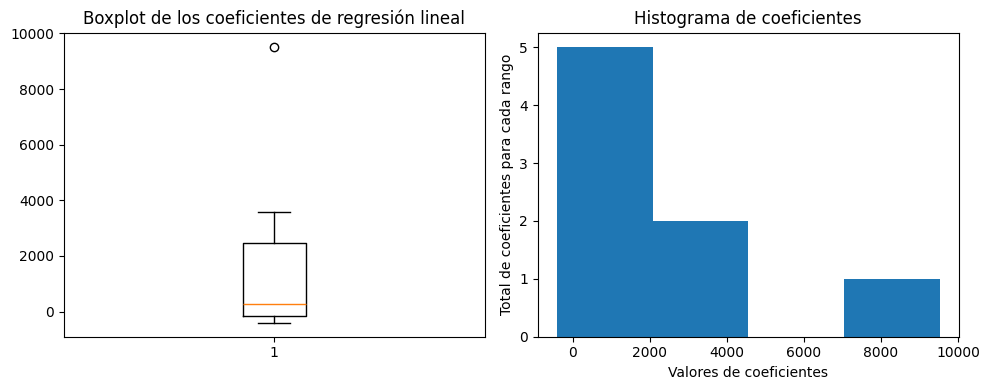

In [117]:
plt.figure(figsize=(10, 4))

# Boxplot de los coeficientes
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')

# Histograma de los coeficientes
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_, bins='sturges')
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')

plt.tight_layout()
plt.show()


**Lasso**

In [118]:
# Entrenamos LassoCV (busca el mejor alpha)
m_lasso = LassoCV(
    alphas=np.logspace(-6, 6, 10),
    cv=5,
    random_state=42,
    n_jobs=-1
).fit(X_train_sc, y_train)

# Predicciones
yhat_train_lasso = m_lasso.predict(X_train_sc)
yhat_lasso = m_lasso.predict(X_test_sc)

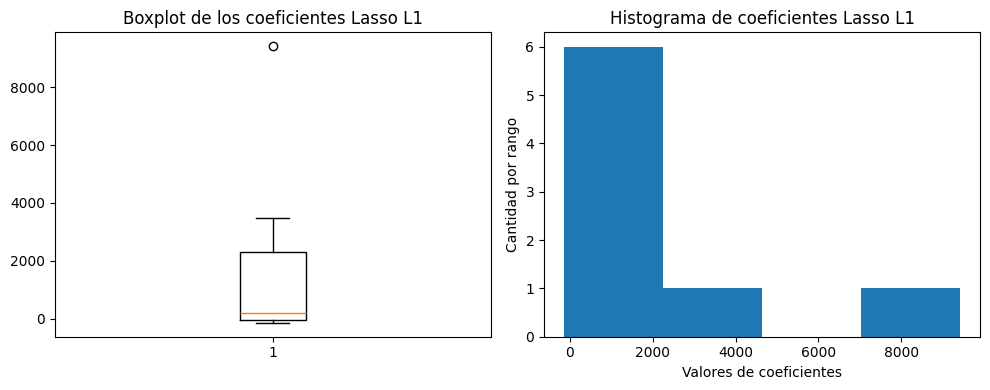

In [119]:
# Grafico de cooficiente Lasso (muchos coeficientes se pueden volver 0, eso es normal.)
plt.figure(figsize=(10, 4))

# Boxplot de los coeficientes Lasso
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes Lasso L1')

# Histograma de los coeficientes Lasso
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_, bins='sturges')
plt.xlabel('Valores de coeficientes')
plt.ylabel('Cantidad por rango')
plt.title('Histograma de coeficientes Lasso L1')

plt.tight_layout()
plt.show()



## Lasso eliminó variables que no eran importantes

In [120]:
### Bloque para ver cuántas variables cancela Lasso

print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0]) / len(m_lasso.coef_) * 100, 2)}%') ##qué % de variables Lasso ha dejado con coeficiente 0 (eliminadas)
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')### cuántas variables siguen teniendo coeficiente ≠ 0 (las importantes)


El porcentaje de variables canceladas es: 25.0%
El modelo utiliza 6 variables.


In [121]:
### Métricas de Lasso (train vs test)
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)


,R2,Median AE,MAPE
Train set,0.736405,2505.208756,42.977016
Test set,0.797333,2253.196022,40.040224
Diferencia,-0.060928,252.012734,2.936792


Ridge

In [122]:
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_sc, y_train)

yhat_train_ridge = m_ridge.predict(X_train_sc)
yhat_ridge = m_ridge.predict(X_test_sc)


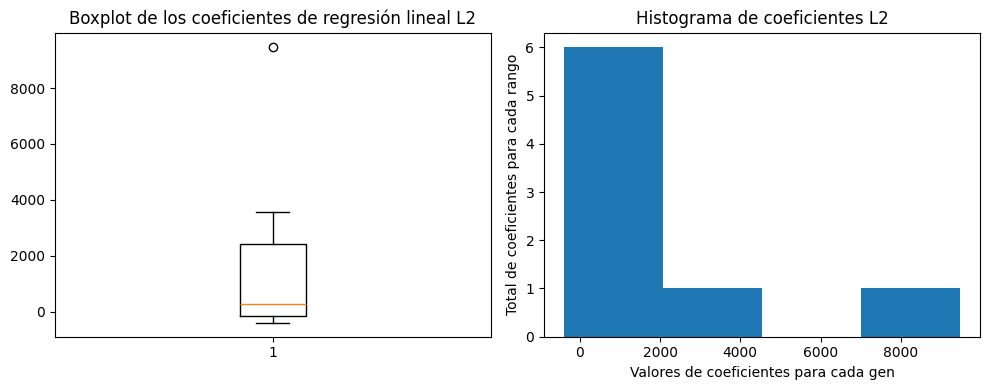

In [123]:
plt.figure(figsize=(10, 4))

# Boxplot coeficientes Ridge
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L2')

# Histograma coeficientes Ridge
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_, bins='sturges')
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L2')

plt.tight_layout()
plt.show()


..Este código es correcto
..Te muestra cómo Ridge no pone coeficientes a cero, pero los encoge
..Se ve que los coeficientes están más “apretados” cerca de 0 que en regresión lineal normal

In [124]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.737011,2488.453485,43.012703
Test set,0.799649,2369.955544,39.677238
Diferencia,-0.062638,118.497941,3.335465


El modelo Ridge muestra un rendimiento muy equilibrado entre el conjunto de entrenamiento y el de prueba. Los valores de R² son altos y muy similares en ambos conjuntos, lo que indica que el modelo es capaz de explicar bien la variabilidad de los datos sin caer en sobreajuste.
Además, los errores (Median AE y MAPE) se mantienen bajos y con diferencias pequeñas entre train y test, lo que confirma que Ridge genera predicciones estables y generaliza correctamente a datos nuevos.
En conjunto, Ridge se comporta como un modelo sólido y regularizado, que reduce la variabilidad excesiva sin eliminar completamente variables importantes.